In [15]:
# To fetch data
from pandas_datareader import data as pdr
!pip install yfinance
import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')
#https://usharbudha-dev09.medium.com/eda-of-stock-market-using-time-series-9662fd18bfc5

In [16]:
#import libraries
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


[*********************100%***********************]  1 of 1 completed


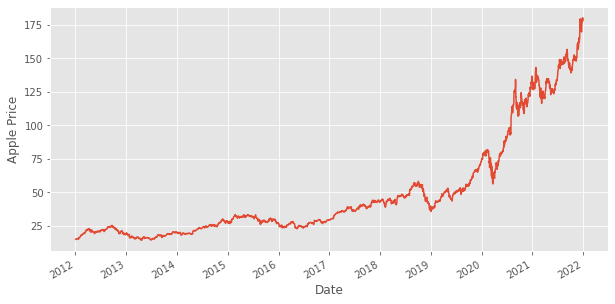

In [17]:
df = pdr.get_data_yahoo('AAPL', start="2012-01-01", end="2021-12-31")         
df= df.dropna()
df.Close.plot(figsize=(10,5))
plt.ylabel("Apple Price")
plt.show()

In [18]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [19]:
# Moving Avergae = 100 days
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

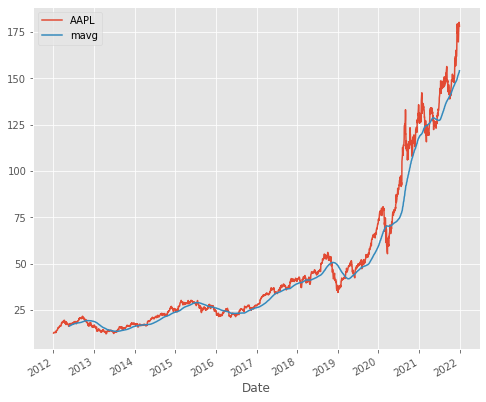

In [21]:
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In [22]:
#Moving Average
ma_list = [50, 100, 200]

for ma in ma_list:
    
    column_name = f'MA_{ma}'
    df[column_name] = df['Adj Close'].rolling(ma).mean()

    print(df)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.575915   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.643499   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.783868   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.917508   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.897018   
...                ...         ...         ...         ...         ...   
2021-12-23  175.850006  176.850006  175.270004  176.279999  176.055695   
2021-12-27  177.089996  180.419998  177.070007  180.330002  180.100540   
2021-12-28  180.160004  181.330002  178.529999  179.289993  179.061859   
2021-12-29  179.330002  180.630005  178.139999  179.380005  179.151749   
2021-12-30  179.470001  180.570007  178.089996  178.199997  177.973251   

               Volume       MA_50  
D

In [23]:
df.fillna(0,inplace=True)


In [24]:
df.isnull()

,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_100,MA_200
Date,,,,,,,,,
2012-01-03,False,False,False,False,False,False,False,False,False
2012-01-04,False,False,False,False,False,False,False,False,False
2012-01-05,False,False,False,False,False,False,False,False,False
2012-01-06,False,False,False,False,False,False,False,False,False
2012-01-09,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2021-12-23,False,False,False,False,False,False,False,False,False
2021-12-27,False,False,False,False,False,False,False,False,False
2021-12-28,False,False,False,False,False,False,False,False,False


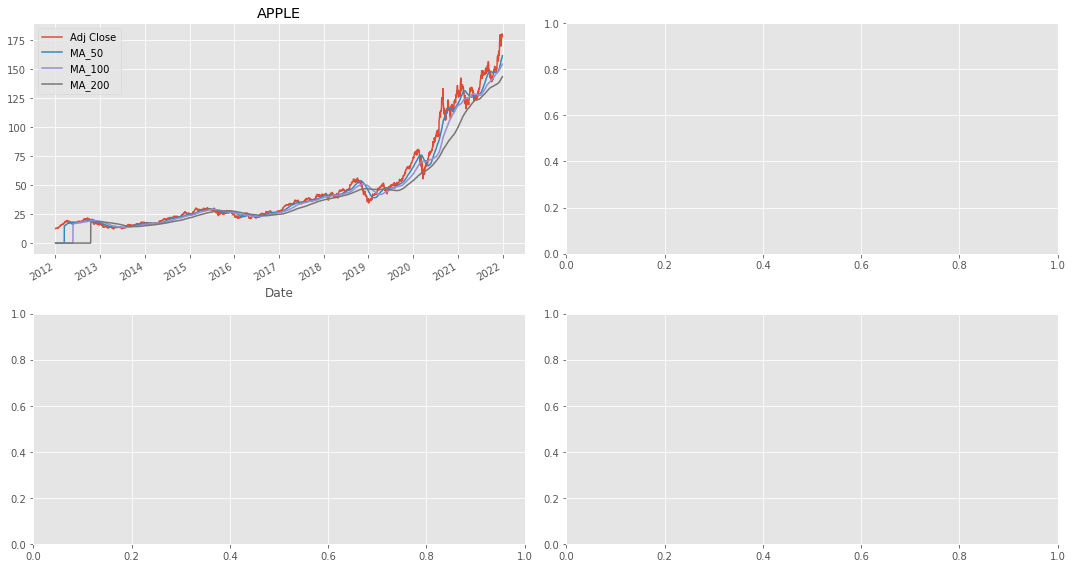

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
df[['Adj Close', 'MA_50', 'MA_100', 'MA_200']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

fig.tight_layout()

In [26]:
df.describe().T #for APPLE

,count,mean,std,min,25%,50%,75%,max
Open,2516.0,4.896522e+01,3.861666e+01,1.385607e+01,2.366750e+01,3.234375e+01,5.411625e+01,1.811200e+02
High,2516.0,4.947798e+01,3.908127e+01,1.427143e+01,2.390571e+01,3.264250e+01,5.481500e+01,1.821300e+02
Low,2516.0,4.846502e+01,3.817468e+01,1.375357e+01,2.341813e+01,3.208125e+01,5.333250e+01,1.785300e+02
Close,2516.0,4.899329e+01,3.865549e+01,1.394750e+01,2.365902e+01,3.235750e+01,5.390563e+01,1.803300e+02
Adj Close,2516.0,4.717291e+01,3.924252e+01,1.211916e+01,2.122447e+01,2.953966e+01,5.224932e+01,1.801005e+02
Volume,2516.0,2.151439e+08,1.758699e+08,4.100000e+07,1.032077e+08,1.513560e+08,2.652520e+08,1.506120e+09
MA_50,2516.0,4.540666e+01,3.763857e+01,0.000000e+00,2.028818e+01,2.905928e+01,5.061958e+01,1.612735e+02
MA_100,2516.0,4.374455e+01,3.642317e+01,0.000000e+00,1.922056e+01,2.854960e+01,4.919950e+01,1.539906e+02
MA_200,2516.0,4.054997e+01,3.405419e+01,0.000000e+00,1.834929e+01,2.760482e+01,4.644264e+01,1.431872e+02


In [27]:
from pandas_datareader.data import DataReader
from datetime import datetime

In [ ]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'BABA']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
#For loop for getting the stock data
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/Users/hweeli/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/hweeli/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/multitasking/__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 188, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 202, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/yfinance/base.py", line 153, in history
    _time.strptime(str(start), '%Y-%m-%d')))
  File "/Users/hweeli/opt

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN, FB, BABA]
company_name = ["APPLE", "GOOGLE", "MICRSOFT", "AMAZON", "FACEBOOK", "ALIBABA"]
for company, com_name in zip(company_list, company_name):
company[“company_name”] = com_name

df = pd.concat(company_list, axis=0)
df.sample(10)

In [ ]:
#to see a historical view of the closing price. For historical view I’ll be using Adj. Closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
plt.subplot(2, 2, i)
company['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f”{tech_list[i - 1]}”)

In [ ]:
# For plotting the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
plt.subplot(2, 2, i)
company["Volume"].plot()
plt.ylabel("Volume")
plt.xlabel(None)
plt.title(f”{tech_list[i - 1]}”)

In [ ]:
Calculating Moving Average with lag of 10, 20, 50 days.
#Moving Average
ma_day = [50,100,200]
for ma in ma_day:
for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company["Adj Close"].rolling(ma).mean()
print(GOOG.columns)
df.groupby(“company_name”).hist(figsize=(12, 12));



In [ ]:
#Below is the subplot of tech companies with moving average of 50,100,200,
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')
AMZN[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

FB[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[1,1])
axes[1,1].set_title("META")

BABA[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[1,1])
axes[1,1].set_title("ALIBABA")

fig.tight_layout()

In [ ]:
company[‘Daily Return’] = company['Adj Close'].pct_change()
# To plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
AAPL[‘Daily Return’].plot(ax=axes[0,0], legend=True, linestyle=’ — ‘, marker=’o’)
axes[0,0].set_title(‘APPLE’)
GOOG[‘Daily Return’].plot(ax=axes[0,1], legend=True, linestyle=’ — ‘, marker=’o’)
axes[0,1].set_title(‘GOOGLE’)
MSFT[‘Daily Return’].plot(ax=axes[1,0], legend=True, linestyle=’ — ‘, marker=’o’)
axes[1,0].set_title(‘MICROSOFT’)
AMZN[‘Daily Return’].plot(ax=axes[1,1], legend=True, linestyle=’ — ‘, marker=’o’)
axes[1,1].set_title(‘AMAZON’)


In [ ]:
# Creating a new DataFrame for Closing prices
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

In [ ]:
# Making a new DataFrame for returns
tech_rets = closing_df.pct_change()
tech_rets.head()

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')


In [ ]:
# To compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

In [ ]:
sns.pairplot(tech_rets, kind='reg')

In [ ]:
# Correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')